In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
from tqdm.auto import tqdm
import pandas as pd
import networkx as nx

In [3]:
project_root = os.path.abspath(
    os.path.join("C:/Users/jllgo/OneDrive/Documentos/UFMG/MSc & MSI 2/MatchSegmentation")
)
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from src.pass_networks.process_intervals import load_graphs
from src.pass_networks.pass_network import calculate_metrics 
from src.pass_networks.custom_metrics import calculate_average_path_legth_target
from src.pass_networks.custom_metrics import calculate_ffl
from src.pass_networks.custom_metrics import calculate_simrank
from src.pass_networks.custom_metrics import calculate_wasserstein_distance
from src.pass_networks.custom_metrics import calculate_modularity
from src.pass_networks.custom_metrics import calculate_graph_distance_stream

# Get Graphs

In [5]:
PROCESSED_DATA_PATH = "../data/processed/PL-22-23"
CSV_DATA_PATH = "../data/csv"

In [6]:
games = os.listdir(PROCESSED_DATA_PATH)
game_ids = [game.split('.')[0] for game in games]
print(f"Games to process: {len(game_ids)}")

Games to process: 9


In [17]:
matches = []

for match_id in tqdm(game_ids, desc="Loading Graphs", total=len(game_ids)):
    match_graphs = load_graphs(match_id, PROCESSED_DATA_PATH)
    matches += match_graphs

Loading Graphs:   0%|          | 0/9 [00:00<?, ?it/s]

In [19]:
matches_df = pd.DataFrame(matches)
matches_df

,match_id,interval_id,team_id,graph
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
1,4436,1.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
2,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
3,4436,2.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
4,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
...,...,...,...,...
877,4446,49.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)"
878,4446,50.0,2,"(-1, 3, 34, 11, 14, 1, 5, 8, 6, 12, 18, 10)"
879,4446,50.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)"
880,4446,51.0,2,"(-1, 3, 34, 11, 14, 1, 5, 8, 6, 12, 18, 10)"


# Graph Stream

In [29]:
selected_metrics = {
    "Density": nx.density,
    "Average Clustering": nx.average_clustering,
    "Betweenness Centrality": nx.betweenness_centrality,
    "Closeness Centrality": nx.closeness_centrality,
    "Averge Path Length": calculate_average_path_legth_target,
}

In [41]:
distance_metrics = {    
    #"GED": nx.graph_edit_distance,
    # "SimRank": calculate_simrank,
    "Wasserstein": calculate_wasserstein_distance
}

In [34]:
for metric_name, metric_func in selected_metrics.items():
    matches_df[metric_name] = matches_df["graph"].apply(lambda x: metric_func(x))

matches_df.head()

,match_id,interval_id,team_id,graph,Density,Average Clustering,Betweenness Centrality,Closeness Centrality,Averge Path Length
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.106061,0.000000,"{-1: 0.0, 35: 0.14545454545454545, 9: 0.0, 34:...","{-1: 0.0, 35: 0.3232323232323232, 9: 0.1888111...",inf
1,4436,1.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)",0.090909,0.089286,"{-1: 0.0, 17: 0.09090909090909091, 13: 0.0, 15...","{-1: 0.0, 17: 0.25252525252525254, 13: 0.0, 15...",inf
2,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.075758,0.062500,"{-1: 0.0, 35: 0.09999999999999999, 9: 0.009090...","{-1: 0.2727272727272727, 35: 0.204545454545454...",1.714286
3,4436,2.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)",0.090909,0.126389,"{-1: 0.0, 17: 0.0, 13: 0.03636363636363636, 15...","{-1: 0.0, 17: 0.1818181818181818, 13: 0.192513...",inf
4,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.174242,0.242645,"{-1: 0.0, 35: 0.10454545454545452, 9: 0.081818...","{-1: 0.0, 35: 0.43315508021390375, 9: 0.409090...",inf


In [35]:
df_sorted = matches_df.sort_values(by=['match_id', 'team_id', 'interval_id']).reset_index(drop=True)
df_sorted

,match_id,interval_id,team_id,graph,Density,Average Clustering,Betweenness Centrality,Closeness Centrality,Averge Path Length
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.106061,0.000000,"{-1: 0.0, 35: 0.14545454545454545, 9: 0.0, 34:...","{-1: 0.0, 35: 0.3232323232323232, 9: 0.1888111...",inf
1,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.075758,0.062500,"{-1: 0.0, 35: 0.09999999999999999, 9: 0.009090...","{-1: 0.2727272727272727, 35: 0.204545454545454...",1.714286
2,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.174242,0.242645,"{-1: 0.0, 35: 0.10454545454545452, 9: 0.081818...","{-1: 0.0, 35: 0.43315508021390375, 9: 0.409090...",inf
3,4436,4.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.090909,0.058532,"{-1: 0.0, 35: 0.39999999999999997, 9: 0.127272...","{-1: 0.28321678321678323, 35: 0.34224598930481...",2.600000
4,4436,5.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.121212,0.129299,"{-1: 0.0, 35: 0.13636363636363635, 9: 0.099999...","{-1: 0.27548209366391185, 35: 0.33471074380165...",3.000000
...,...,...,...,...,...,...,...,...,...
877,4446,47.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)",0.000000,0.000000,"{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...","{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...",inf
878,4446,48.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)",0.000000,0.000000,"{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...","{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...",inf
879,4446,49.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)",0.000000,0.000000,"{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...","{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...",inf
880,4446,50.0,9,"(-1, 1, 6, 2, 25, 26, 10, 14, 27, 3, 20, 22)",0.000000,0.000000,"{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...","{-1: 0.0, 1: 0.0, 6: 0.0, 2: 0.0, 25: 0.0, 26:...",inf


In [45]:
df_grouped = df_sorted.groupby(['match_id', 'team_id']).size()
df_grouped

match_id  team_id
4436      2          48
          7          48
4438      1          50
          3          50
4439      20         49
          55         49
4440      9          48
          119        48
4441      13         48
          221        48
4442      16         48
          17         48
4443      6          52
          8          52
4444      4          49
          12         49
4446      2          49
          9          49
dtype: int64

In [46]:
# Lista para armazenar os resultados
distance_data = []

# Itera sobre os grupos de 'match_id' e 'team_id'
for (match_id, team_id), group in tqdm(df_sorted.groupby(['match_id', 'team_id']), desc="Calculating Distances", total=len(df_sorted.groupby(['match_id', 'team_id']))):
    # Ordena o grupo por 'interval_id'
    group = group.sort_values(by='interval_id').reset_index(drop=True)
    # Itera sobre os pares de grafos consecutivos
    for i in tqdm(range(len(group) - 1), desc="Calculating Distances", total=len(group) - 1):
        current_row = group.iloc[i]
        next_row = group.iloc[i + 1]
        # Verifica se os 'interval_id' são consecutivos
        distances = {'match_id': match_id, 'team_id': team_id, 'interval_id': current_row['interval_id']}
        G1 = current_row['graph']
        G2 = next_row['graph']
        # Calcula cada métrica de distância
        for metric_name, metric_fn in distance_metrics.items():
            distances[metric_name] = metric_fn(G1, G2)
        distance_data.append(distances)

# Cria o novo DataFrame com as métricas de distância
df_distances = pd.DataFrame(distance_data)
df_distances

Calculating Distances:   0%|          | 0/18 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/49 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/49 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/47 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/51 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/51 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

Calculating Distances:   0%|          | 0/48 [00:00<?, ?it/s]

,match_id,team_id,interval_id,Wasserstein
0,4436,2,1.0,0.666667
1,4436,2,2.0,2.166667
2,4436,2,3.0,1.833333
3,4436,2,4.0,0.666667
4,4436,2,5.0,0.666667
...,...,...,...,...
859,4446,9,46.0,0.000000
860,4446,9,47.0,0.000000
861,4446,9,48.0,0.000000
862,4446,9,49.0,0.000000


In [48]:
df_distances.iloc[:10]

,match_id,team_id,interval_id,Wasserstein
0,4436,2,1.0,0.666667
1,4436,2,2.0,2.166667
2,4436,2,3.0,1.833333
3,4436,2,4.0,0.666667
4,4436,2,5.0,0.666667
5,4436,2,6.0,0.833333
6,4436,2,7.0,0.166667
7,4436,2,8.0,1.166667
8,4436,2,9.0,0.333333
9,4436,2,10.0,0.833333


In [168]:
from src.concept_drift.drift_points import detect_kswin_drift
import numpy as np

metric_series7 = df_distances[(df_distances['match_id']==4436) & (df_distances['team_id']==7)]['Wasserstein'].values
print(metric_series7)
metric_series2 = df_distances[(df_distances['match_id']==4436) & (df_distances['team_id']==2)]['Wasserstein'].values
print(metric_series2)
metric_series = np.sum([metric_series7,metric_series2],axis=0)
print(metric_series)

[0.33333333 1.66666667 0.33333333 0.5        0.66666667 0.16666667
 0.16666667 1.66666667 1.83333333 0.83333333 1.33333333 0.66666667
 1.5        0.83333333 2.83333333 3.16666667 0.5        0.5
 1.83333333 1.33333333 0.5        0.33333333 0.66666667 1.83333333
 2.         0.5        2.         0.66666667 0.85897436 1.69230769
 1.16666667 1.         1.5        1.33333333 0.66666667 0.83333333
 2.16666667 2.83333333 1.83333333 2.83333333 2.5        0.33333333
 0.66666667 2.66666667 1.5        1.         2.5       ]
[0.66666667 2.16666667 1.83333333 0.66666667 0.66666667 0.83333333
 0.16666667 1.16666667 0.33333333 0.83333333 1.5        1.5
 1.33333333 1.83333333 0.83333333 2.16666667 0.33333333 0.5
 1.83333333 0.5        0.66666667 0.83333333 1.33333333 0.5
 0.16666667 0.5        1.66666667 1.83333333 0.16666667 0.
 1.         0.66666667 0.5        1.66666667 0.66666667 0.5
 1.         0.33333333 0.16666667 0.33333333 0.16666667 2.16666667
 1.83333333 0.5        0.16666667 0.16666667 0.5

# Viz

In [197]:
drift_points = detect_kswin_drift(metric_series, a=0.1,ws=10,ss=3,seed=42)
print(drift_points)

[9, 21, 39]


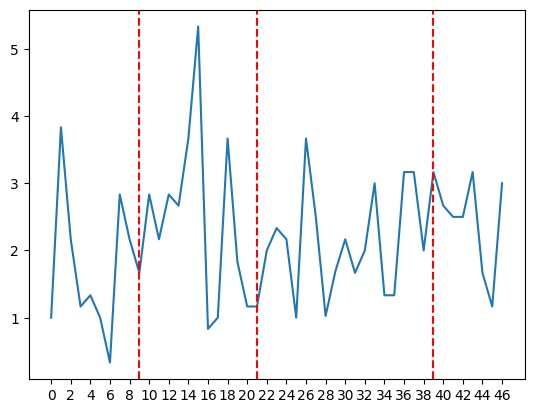

In [199]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(metric_series)
for point in drift_points:
    plt.axvline(x=point, color='r', linestyle='--')

plt.xticks(np.arange(0, len(metric_series), step=2))
plt.show()

# Concept Drift